In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance
from sklearn.metrics import jaccard_similarity_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.cluster import AgglomerativeClustering

In [2]:
df=pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
quality = df["quality"].values
category = []
for num in quality:
    if num<5:
        category.append("Bad")
    elif num>6:
        category.append("Good")
    else:
        category.append("Mid")

In [4]:
category = pd.DataFrame(data=category, columns=["category"])
df = pd.concat([df,category],axis=1)
df.drop(columns="quality",axis=1,inplace=True)

In [5]:
le=LabelEncoder()
df['category']=le.fit_transform(df['category'])
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,category
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,2
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2


In [6]:
data=df.drop('category',axis=1)

scale=StandardScaler()
z=scale.fit_transform(data)
data=pd.DataFrame(data=z,columns=data.columns)
data['quality']=df['category']
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,2
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,2
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,2
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,2
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,2


# 1. Use features fixed acidity and volatile acidity

In [7]:
X=data.drop(['citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality'],axis=1)
y=data['quality']

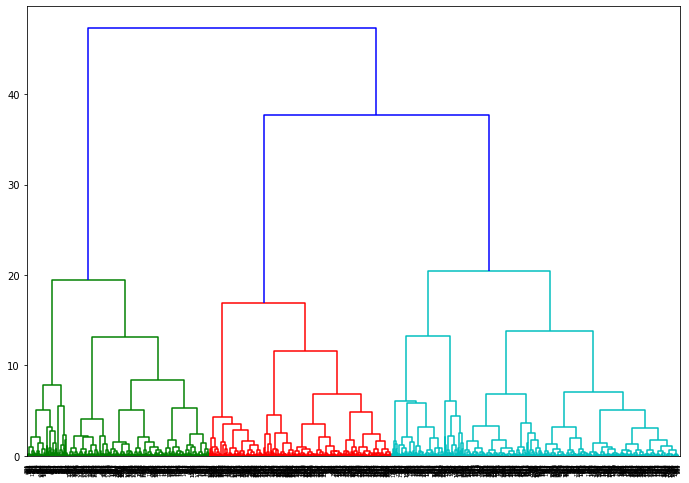

In [8]:
fig,ax= plt.subplots()
fig.set_size_inches(11.7, 8.27)
z=linkage(X,'ward')
dendrogram(z,labels=X.index,leaf_rotation=90)
plt.show()

In [9]:
cluster=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
cluster.fit_predict(X)

array([0, 0, 0, ..., 2, 2, 2], dtype=int64)

# 2. Use features Cirtic acidity and fixed acidity

In [10]:
X=data.drop(['volatile acidity','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality'],axis=1)
y=data['quality']

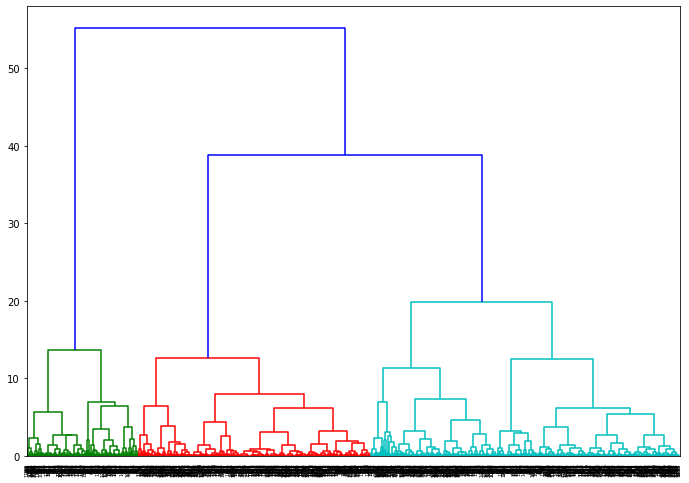

In [11]:
fig,ax= plt.subplots()
fig.set_size_inches(11.7, 8.27)
z=linkage(X,'ward')
dendrogram(z,labels=X.index,leaf_rotation=90)
plt.show()

In [12]:
cluster=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
cluster.fit_predict(X)

array([2, 2, 2, ..., 2, 2, 0], dtype=int64)

# 3. Use features residual sugar and sulphades

In [13]:
X=data.drop(['fixed acidity','volatile acidity','citric acid','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','alcohol','quality'],axis=1)
y=data['quality']

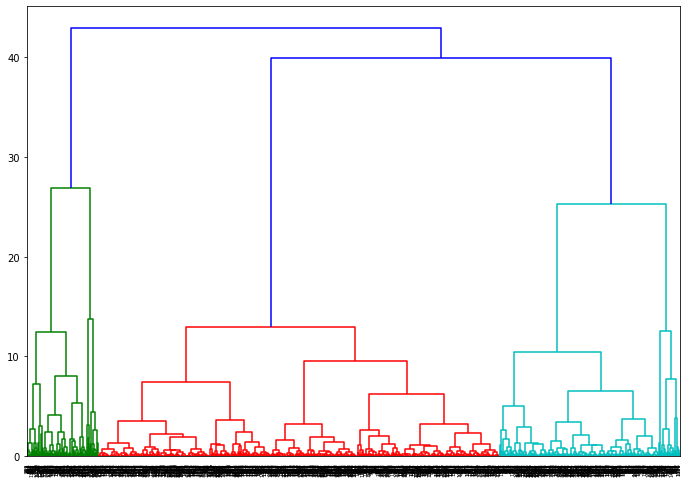

In [14]:
fig,ax= plt.subplots()
fig.set_size_inches(11.7, 8.27)
z=linkage(X,'ward')
dendrogram(z,labels=X.index,leaf_rotation=90)
plt.show()

In [15]:
cluster=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
cluster.fit_predict(X)

array([2, 1, 2, ..., 1, 1, 0], dtype=int64)

# 4. Use features free.sulfur.dioxide and total.sulfur.dioxide

In [16]:
X=data.drop(['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','density','pH','sulphates','alcohol','quality'],axis=1)
y=data['quality']

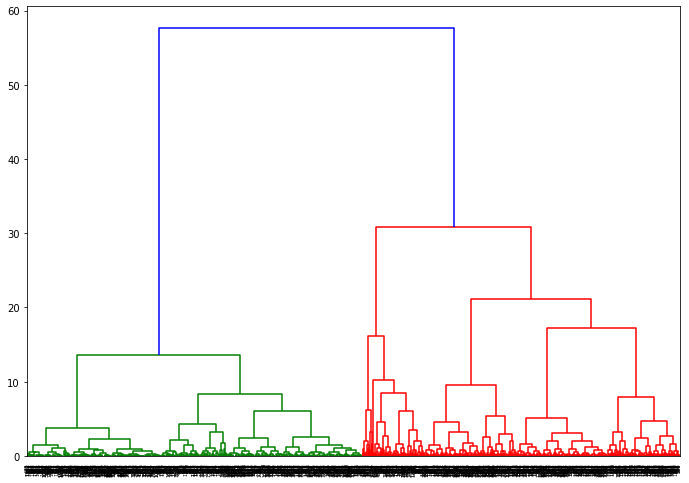

In [17]:
fig,ax= plt.subplots()
fig.set_size_inches(11.7, 8.27)
z=linkage(X,'ward')
dendrogram(z,labels=X.index,leaf_rotation=90)
plt.show()

In [25]:
cluster=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
cluster.fit_predict(X)

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

# 5. Use features fixed acidity, citric acidity and volatile acidity

In [19]:
X=data.drop(['residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality'],axis=1)
y=data['quality']

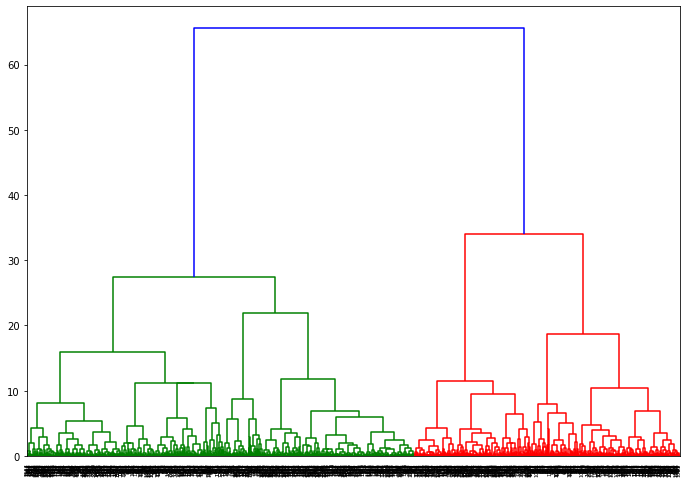

In [20]:
fig,ax= plt.subplots()
fig.set_size_inches(11.7, 8.27)
z=linkage(X,'ward')
dendrogram(z,labels=X.index,leaf_rotation=90)
plt.show()

In [26]:
cluster=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
cluster.fit_predict(X)

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

# 6. Use features density and pH

In [22]:
X=data.drop(['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','sulphates','alcohol','quality'],axis=1)
y=data['quality']

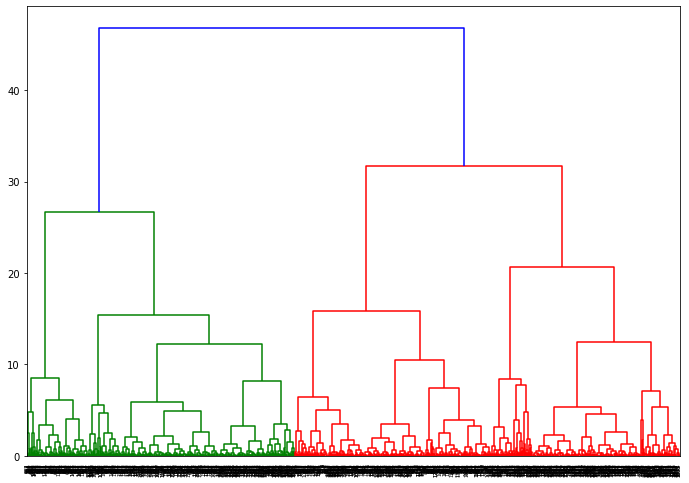

In [23]:
fig,ax= plt.subplots()
fig.set_size_inches(11.7, 8.27)
z=linkage(X,'ward')
dendrogram(z,labels=X.index,leaf_rotation=90)
plt.show()

In [27]:
cluster=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
cluster.fit_predict(X)

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)